## Arrest Data

First, I imported pandas and loaded the data from the csv file and checked to make sure that it imported correctly.

In [2]:
#read the csv file and check it
import pandas as pd
arrests = pd.read_csv("arrest_data.csv")
arrests.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


<br/>
I turned the csv file into a dictionary where the keys were the neighborhoods, and the values were the amount of times a neighborhood showed up by iterating over the Incident Neighborhood column.

In [3]:
#count how many times each neighborhood appears using a dictionary
neighbor = dict()

for index, row in arrests.iterrows():
    item = row['INCIDENTNEIGHBORHOOD']
    
    if item not in neighbor:
        neighbor[item] = 1
    else:
        neighbor[item] = neighbor[item] + 1
        
print(neighbor)

{'Bloomfield': 984, 'Outside City': 316, 'Westwood': 226, 'East Allegheny': 2217, 'Crafton Heights': 601, 'Greenfield': 537, 'Brookline': 1390, 'Regent Square': 37, 'East Liberty': 1889, nan: 2489, 'East Hills': 1194, 'Carrick': 2352, 'Allegheny Center': 1244, 'South Side Flats': 3497, 'Sheraden': 1285, 'East Carnegie': 48, 'Golden Triangle/Civic Arena': 83, 'Point Breeze North': 289, 'Perry South': 1057, 'Allentown': 947, 'North Shore': 814, 'Marshall-Shadeland': 1516, 'Central Oakland': 521, 'Middle Hill': 932, 'Strip District': 503, 'Lincoln-Lemington-Belmar': 1362, 'Central Northside': 23, 'Troy Hill-Herrs Island': 6, 'Highland Park': 558, 'Homewood North': 1969, 'Northview Heights': 713, 'Brighton Heights': 1114, 'Hazelwood': 1396, 'Perry North': 587, 'Bedford Dwellings': 665, 'Elliott': 663, 'Beechview': 1201, 'Fineview': 796, 'Glen Hazel': 169, 'Spring Hill-City View': 711, 'Bluff': 1502, 'Manchester': 471, 'Homewood West': 764, 'Outside County': 57, 'Point Breeze': 301, 'Homewo

<br/>
This data is unsorted, so I wanted to turn the dictionary into something that would be easier to manipulate. I turned the dictionary into a data frame.

In [9]:
#Turn dictionary into a data frame
data = {
    "Neighborhood": neighbor.keys(),
    "Arrests": neighbor.values()
}
nbrs = pd.DataFrame(data)

print(nbrs) 

       Neighborhood  Arrests
0        Bloomfield      984
1      Outside City      316
2          Westwood      226
3    East Allegheny     2217
4   Crafton Heights      601
..              ...      ...
94        Ridgemont       37
95   Swisshelm Park       43
96             Hays      120
97   Chartiers City       46
98  Mt. Oliver Boro       18

[99 rows x 2 columns]


<br/>
To find out the neighborhood with the least amount of arrests, I need to sort the data, so I sorted the data frame by the number of arrests.

In [10]:
#Sort values
nbrs = nbrs.sort_values(by="Arrests")
print(nbrs)

                 Neighborhood  Arrests
83    Mt. Oliver Neighborhood        2
27     Troy Hill-Herrs Island        6
98            Mt. Oliver Boro       18
26          Central Northside       23
94                  Ridgemont       37
..                        ...      ...
3              East Allegheny     2217
11                    Carrick     2352
9                         NaN     2489
13           South Side Flats     3497
87  Central Business District     4440

[99 rows x 2 columns]


<br/>
Now, I would like to visualize the data with a (bad) bar graph.

<Axes: >

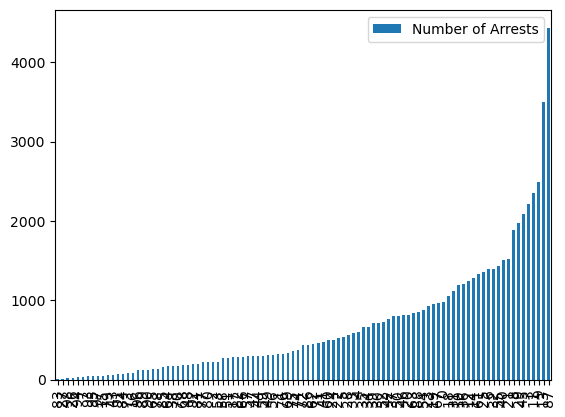

In [6]:
#plot data
nbrs.plot.bar()

<br/>
That is unreadable, but I don't need to know the arrests for every neighborhood. That is why we sorted the data, so I am only going to look at the 10 neighborhoods with the least amount of arrests.

<Axes: xlabel='Neighborhood', ylabel='Number of Arrests'>

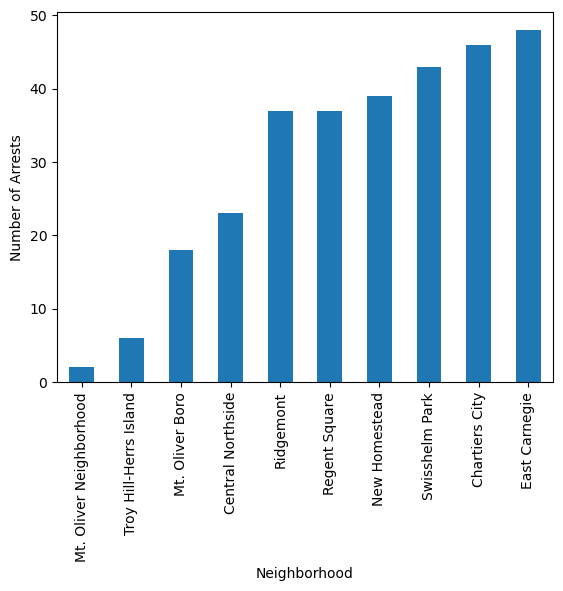

In [11]:
#plot better
nbrs[:10].plot.bar(x="Neighborhood", y="Arrests", ylabel="Number of Arrests", legend=False)

## Firearm Data

First, I imported pandas and loaded the data from the csv file and checked to make sure that it imported correctly.

In [2]:
#read the csv file and check it
import pandas as pd
firearms = pd.read_csv("gun_data.csv")
firearms.head()

,_id,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
0,1,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
1,2,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
2,3,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
3,4,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
4,5,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN


<br/>
I turned the csv file into a dictionary where the keys were the neighborhoods, and the values were the amount of times a neighborhood showed up by iterating over the Incident Neighborhood column.

In [3]:
#count how many times each neighborhood appears using a dictionary
guns = dict()

for index, row in firearms.iterrows():
    item = row['neighborhood']
    
    if item not in guns:
        guns[item] = 1
    else:
        guns[item] = guns[item] + 1
        
print(guns)

{'Mount Oliver Borough': 7, 'Sheraden': 108, 'Terrace Village': 40, 'Brighton Heights': 82, nan: 781, 'Westwood': 10, 'East Liberty': 74, 'Upper Lawrenceville': 11, 'Marshall-Shadeland': 108, 'Beechview': 65, 'East Hills': 109, 'Arlington': 28, 'Arlington Heights': 8, 'Mount Washington': 78, 'South Side Flats': 180, 'Hazelwood': 112, 'Homewood South': 252, 'Greenfield': 22, 'Bloomfield': 38, 'Beltzhoover': 43, 'Homewood North': 130, 'Upper Hill': 28, 'Perry South': 112, 'Lincoln-Lemington-Belmar': 103, 'Bedford Dwellings': 69, 'Homewood West': 53, 'Carrick': 117, 'Central Northside': 59, 'Chateau': 22, 'Fineview': 62, 'Chartiers City': 4, 'Larimer': 107, 'Polish Hill': 10, 'South Shore': 12, 'Highland Park': 31, 'Knoxville': 96, 'Lower Lawrenceville': 13, 'Allentown': 67, 'Spring Hill-City View': 65, 'Garfield': 80, 'Bluff': 50, 'Overbrook': 25, 'South Side Slopes': 37, 'Central Business District': 112, 'Banksville': 10, 'Perry North': 33, 'Friendship': 3, 'Crawford-Roberts': 50, 'Midd

<br/>
This data is unsorted, so I wanted to turn the dictionary into something that would be easier to manipulate. I turned the dictionary into a data frame.

In [5]:
#Turn dictionary into a data frame
data = {
    "Neighborhood": guns.keys(),
    "Firearms": guns.values()
}
gn = pd.DataFrame(data)

print(gn) 

            Neighborhood  Firearms
0   Mount Oliver Borough         7
1               Sheraden       108
2        Terrace Village        40
3       Brighton Heights        82
4                    NaN       781
..                   ...       ...
84            Mt. Oliver         4
85              West End         6
86                Esplen         9
87                  Hays         7
88        Swisshelm Park         1

[89 rows x 2 columns]


<br/>
To find out the neighborhood with the least amount of arrests, I need to sort the data, so I sorted the data frame by the number of arrests.

In [6]:
#Sort values
gn = gn.sort_values(by="Firearms")
print(gn)

        Neighborhood  Firearms
88    Swisshelm Park         1
64       Summer Hill         2
46        Friendship         3
76     Regent Square         4
79           Oakwood         4
..               ...       ...
26           Carrick       117
20    Homewood North       130
14  South Side Flats       180
16    Homewood South       252
4                NaN       781

[89 rows x 2 columns]


<br/>
Now, I would like to visualize the data with a (bad) bar graph.

<Axes: >

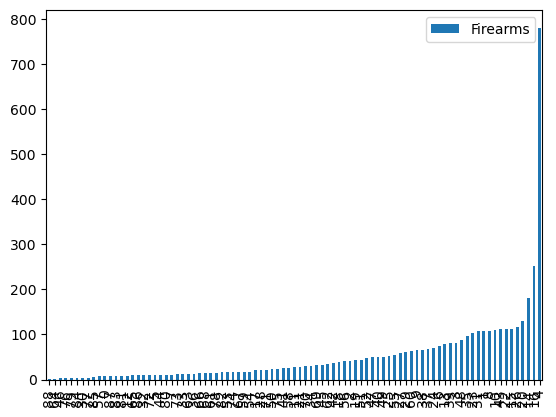

In [7]:
#plot data
gn.plot.bar()

<br/>
That is unreadable, but I don't need to know the arrests for every neighborhood. That is why we sorted the data, so I am only going to look at the 10 neighborhoods with the least amount of arrests.

<Axes: xlabel='Neighborhood', ylabel='Number of Firearm Seizures'>

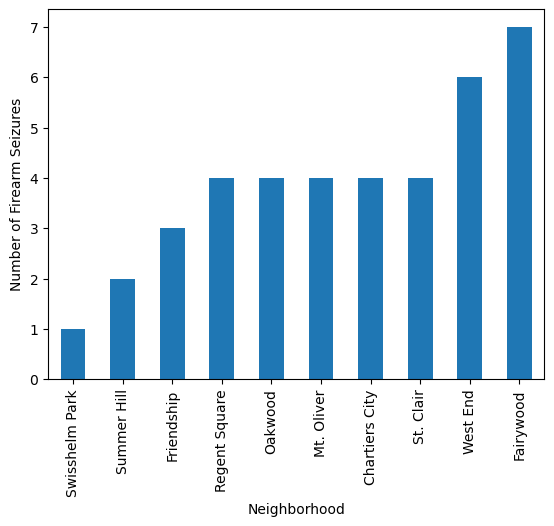

In [9]:
#plot better
gn[:10].plot.bar(x="Neighborhood", y="Firearms", ylabel="Number of Firearm Seizures", legend=False)

Based on the data regarding safety, the four safest neighborhoods are Swisshelm Park, Regent Square, Mt. Oliver, and Chartiers City. We are assuming that Mt. Oliver Neighborhood and Mt. Oliver Boro from the arrest data 